<a href="https://colab.research.google.com/github/Ymin-2/ESAA/blob/main/YB_1121_%EC%97%B0%EC%8A%B5%EB%AC%B8%EC%A0%9C_%EC%B0%A8%EC%9B%90%EC%B6%95%EC%86%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 데이터 로드
from sklearn.datasets import fetch_openml
mnist=fetch_openml('mnist_784', version=1)

In [2]:
# train, test split
X_train = mnist['data'][:60000]
y_train = mnist['target'][:60000]
X_test = mnist['data'][60000:]
y_test = mnist['target'][60000:]

* 랜덤포레스트에 적용

In [3]:
# 랜덤포레스트에 적용 (n_estimators=10, random_state=42)
from sklearn.ensemble import RandomForestClassifier

rnd_clf=RandomForestClassifier(n_estimators=10, random_state=42)
rnd_clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=42)

In [4]:
# 정확도 결과
from sklearn.metrics import accuracy_score

y_pred=rnd_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.9492

# 1. PCA

* PCA로 변환한 데이터 세트에 랜덤 포레스트 적용

In [5]:
# PCA 라이브러리 불러오기
from sklearn.decomposition import PCA

In [6]:
# PCA 적용 95% : n_components=0.95
pca=PCA(n_components=0.95)
X_train_pca=pca.fit_transform(X_train)

In [7]:
# PCA 이후 랜덤포레스트 훈련
rnd_clf2=RandomForestClassifier(n_estimators=10, random_state=42)
rnd_clf2.fit(X_train_pca, y_train)

RandomForestClassifier(n_estimators=10, random_state=42)

In [8]:
# 정확도 결과 (X_test도 PCA 적용해야합니다.)
X_test_pca=pca.transform(X_test)
y_pred=rnd_clf2.predict(X_test_pca)
accuracy_score(y_test, y_pred)

0.8925

**관련 문제**

* PCA모델을 와인 데이터셋에 적용하여 차원을 축소하고 그 결과를 그래프로 나타내보세요.

(1) 필요한 모듈 불러오기

In [9]:
from sklearn.datasets import load_wine
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

(2)  load_wine을 사용해 데이터셋을 생성한다.

In [10]:
wine = load_wine()
X = wine.data
y = wine.target

(3) X에 표준 스케일링(Standard scaling)을 적용하여 X_scaled을 생성한다.

In [11]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

(4) PCA 모델을 X에 적용하여 2개의 차원으로 추출한다. 단, random_state=1234로 설정한다.

In [13]:
#PCA 모델을 X_scaled에 적용하여 2개의 차원으로 추출한다.
pca = PCA(n_components=2, random_state=1234)
X_pca = pca.fit_transform(X_scaled)

df_pca = pd.DataFrame({
    'PC1': X_pca[:,0],
    'PC2': X_pca[:,1],
    'target': y
})

(5) 추출한 피처를 그래프로 나타내라.

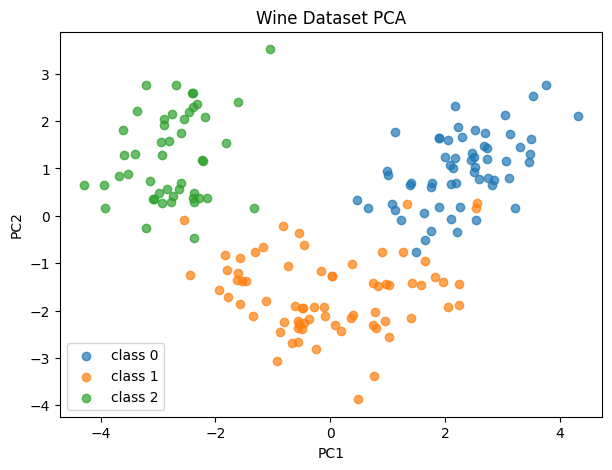

In [14]:
plt.figure(figsize=(7,5))
for t in df_pca['target'].unique():
    subset = df_pca[df_pca['target'] == t]
    plt.scatter(subset['PC1'], subset['PC2'], label=f'class {t}', alpha=0.7)

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.title('Wine Dataset PCA')
plt.show()

# 2. LDA

- LDA로 변환한 데이터 세트에 랜덤 포레스트 적용

In [15]:
# LDA 라이브러리 불러오기
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [16]:
# LDA 적용 : n_components=5
lda = LinearDiscriminantAnalysis(n_components=5)
X_train_lda = lda.fit_transform(X_train, y_train)

In [17]:
# LDA 이후 랜덤포레스트 훈련
rnd_clf3=RandomForestClassifier(n_estimators=10, random_state=42)
rnd_clf3.fit(X_train_lda, y_train)

RandomForestClassifier(n_estimators=10, random_state=42)

In [18]:
# 정확도 결과 (X_test도 LDA 적용해야합니다.)
X_test_lda=lda.transform(X_test)
y_pred=rnd_clf3.predict(X_test_lda)
accuracy_score(y_test, y_pred)

0.8301